In [46]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

### Subdivision method

#### Parse mesh  
OpenFOAM _polyMesh_ directory stores the mesh data  
_points_ file stores the vertices  
_faces_ defines which vertices make up a face  
_owner_ assigns the faces to cells

In [47]:
# get vertices
points = []
with open('points') as f:
    for _ in f:
        if '(\n'==_: break
    for _ in f:
        if ')\n'==_: break
        points.append(tuple(map(float, _.replace('\n','').replace('(','').replace(')','').split(' '))))
print(f'vertices: {len(points)}')
# get faces formed by vertices
# (assuming quads)
faces = []
with open('faces') as f:
    for _ in f:
        if '(\n'==_: break
    for _ in f:
        if ')\n'==_: break
        faces.append(tuple(map(int, _.replace('\n','').replace('4(','').replace(')','').split(' '))))
print(f'faces: {len(faces)}')
# get face owners
owner = []
with open('owner') as f:
    for _ in f:
        if '(\n'==_: break
    for _ in f:
        if ')\n'==_: break
        owner.append(int(_.replace('\n','')))
# form cell
cell = [[] for _ in range(max(owner)+1)]
for i,o in enumerate(owner):
    cell[o].append(faces[i])
for i,f in enumerate(cell):
    l=[]
    for p in f:
        for _ in p:
            # l.append(points[_])
            if not points[_][2]>0: l.append(points[_]) # XY-plane
    cell[i]=(list(set(l)))
print(f'cells: {len(cell)}')
# print(cell[7])

vertices: 242
faces: 420
cells: 100


#### Generate unit grid
reference grid which is used to generate interpolation values

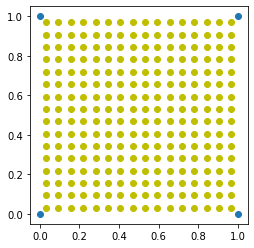

In [48]:
g = [(0,0),(1,0),(0,1),(1,1)] # unit cell
div = 16 # subdivisions
G = [list(((x+0.5)/div,(y+0.5)/div)) for x in range(div) for y in range(div)] # unit grid
plt.scatter(*(zip(*G)),color='y'); plt.scatter(*(zip(*g))); plt.axis('scaled'); # scatter plot of grid and cell vertices

#### Projective Transformation

In [49]:
g = np.float32(g)
G = np.float32(G)
t = np.float32([[0,0],[3,1],[1,4],[5,3]]) # test points
M = cv.getPerspectiveTransform(g,t)
T = cv.perspectiveTransform(G[None,:,:],M).reshape((div*div,2))

#### Map to cells

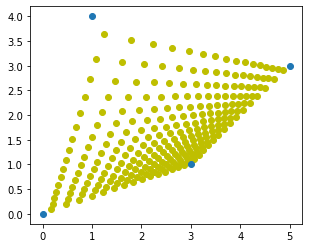

In [50]:
plt.scatter(*zip(*T),color='y'); plt.scatter(*zip(*t)); plt.axis('scaled');

#### Apply condition

#### Generate _alpha_